In [6]:
#import needed pakages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Setp 1: Uploading dataset

In [7]:
# setp 1: Uploading dataset
zircon = pd.read_csv('cubic_zirconia.csv')
zircon


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
#check no of rows and features
zircon.shape

(26967, 11)

In [4]:
#check for column names
zircon.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [3]:
#check for the no of rows, features, null & missing values and dtype
zircon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26957 non-null  float64
 2   cut         26962 non-null  object 
 3   color       26964 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26266 non-null  float64
 6   table       26961 non-null  float64
 7   x           26960 non-null  float64
 8   y           26957 non-null  float64
 9   z           26959 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### **Metadata**
1.  Carat : 	 Carat weight of the cubic zirconia.
2. Cut :	 Describe the cut quality of the cubic zirconia. Quality is increasing order:
    *  2.1 Fair
    *  2.2 Good
    *  2.3 Very Good
    *  2.4 Premium
    *  2.5 Ideal
3. Color :  	 Color of the cubic zirconia with D being the best and J the worst.
4. Clarity :	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes.
    *  (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
5. Depth :	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Table :	The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. Price :	 The Price of the cubic zirconia.
8. X :	 Length of the cubic zirconia in mm.
9. Y :	 Width of the cubic zirconia in mm.
10. Z :	 Height of the cubic zirconia in mm.


### Step 2, Preprocessing

In [8]:
#work on copy version and keep the original virgin
zircon_df=zircon.copy()
zircon_df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
#dealing duplicate value & check if there is any
duplicates = zircon_df.duplicated()

any_duplicates = duplicates.any()
print(f'\nAre there any duplicates? {any_duplicates}')



Are there any duplicates? False


In [10]:
#doble_check if there is any duplicate or number of duplication
duplicates = zircon_df.duplicated()
duplicates.sum()
print(f'\nAre there any duplicates? {duplicates.sum()}')


Are there any duplicates? 0


In [11]:
#check for missing values
missing = pd.concat([zircon_df.isnull().sum(), 100*zircon_df.isnull().mean()], axis=1)
missing.columns = ['Missing_count', 'Missing_percentage']
missing.sort_values(by='Missing_count', inplace=True)
missing

,Missing_count,Missing_percentage
Unnamed: 0,0,0.000000
clarity,0,0.000000
price,0,0.000000
color,3,0.011125
cut,5,0.018541
table,6,0.022249
x,7,0.025958
z,8,0.029666
carat,10,0.037082
y,10,0.037082


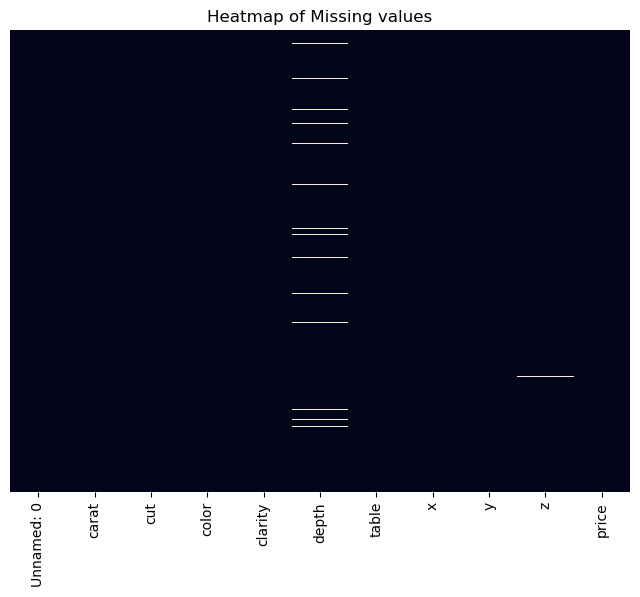

In [12]:
# check on heatmap if there is any relationship between missing values
missing = zircon_df.isnull()

plt.figure(figsize=(8,6))
sns.heatmap(missing, cbar=False, yticklabels=False)
plt.title('Heatmap of Missing values')
plt.show()
#table fdature has the highest missing value among features and there is no relation between table and other feature so drop this feature

In [13]:
#drop depth feature with 701 missing value
zircon_df.dropna(subset=['depth'], inplace=True)

In [14]:
zircon_df.shape

(26266, 11)

In [15]:
#fill null values with mean of that feature
zircon_df['carat'] = zircon_df['carat'].fillna(zircon_df['carat'].mean())
zircon_df['x'] = zircon_df['x'].fillna(zircon_df['x'].mean())
zircon_df['y'] = zircon_df['y'].fillna(zircon_df['y'].mean())
zircon_df['z'] = zircon_df['z'].fillna(zircon_df['z'].mean())
zircon_df['table'] = zircon_df['table'].fillna(zircon_df['table'].mean())


In [16]:
zircon_df.isnull().sum()

Unnamed: 0    0
carat         0
cut           5
color         3
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

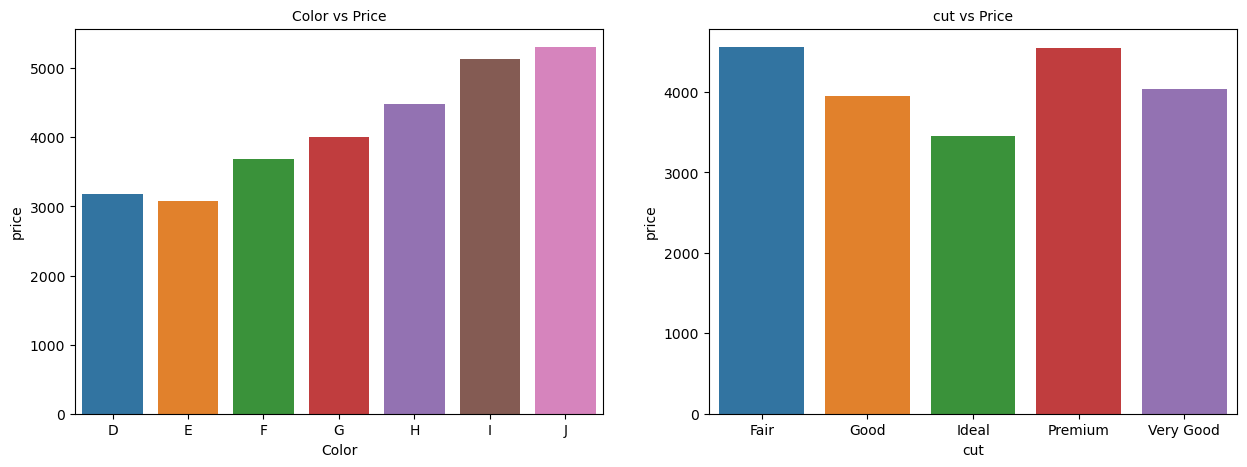

In [17]:
# Create a bar plot to see frequency of cut and color to decide to fill null values

mean_cut = zircon_df.groupby('cut')['price'].mean().reset_index()
mean_color = zircon_df.groupby('color')['price'].mean().reset_index()

fig, ax= plt.subplots(1,2, figsize=(15, 5))
sns.barplot(x='color', y='price', data=mean_color, ax=ax[0])
sns.barplot(x='cut', y='price', data=mean_cut, ax=ax[1])

# Adding title and labels
ax[0].set_title('Color vs Price', fontsize=10)
ax[0].set_xlabel('Color', fontsize=10)
ax[1].set_title('cut vs Price', fontsize=10)
ax[1].set_xlabel('cut', fontsize=10)

plt.show()


In [18]:
#check null values in dataframe and relation with price to decide fill missing value
zircon_df_null= zircon_df[zircon_df['cut'].isnull()]
zircon_df_null

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
3280,3281,0.90,NaN,NaN,SI2,62.8,54.0,6.050000,6.15,3.83,3217
3281,3282,0.90,NaN,NaN,SI1,60.7,57.0,6.210000,6.25,3.78,4401
3282,3283,0.34,NaN,NaN,VVS1,62.2,56.0,4.440000,4.46,2.77,1014
11683,11684,0.35,NaN,E,VS2,62.1,59.0,4.490000,4.46,2.78,984
20206,20207,1.01,NaN,H,SI1,63.1,59.0,5.729086,6.43,4.03,4705


In [19]:
#Considering barchart; based on price range I decide to fill out cut & color null values 
zircon_df.loc[3280,'cut'] = 'Ideal'
zircon_df.loc[3281, 'cut']= 'Premium'
zircon_df.loc[3282, 'cut']= 'Good'
zircon_df.loc[11683, 'cut']= 'Fair'
zircon_df.loc[20206, 'cut']= 'Premium'
zircon_df.loc[3280, 'color']= 'I'
zircon_df.loc[3281, 'color']= 'J'
zircon_df.loc[3282, 'color']= 'G'


In [21]:
#recheck for missing values if there is any after proccessing filling
missing = pd.concat([zircon_df.isnull().sum(), 100*zircon_df.isnull().mean()], axis=1)
missing.columns = ['Missing_count', 'Missing_percentage']
missing.sort_values(by='Missing_count', inplace=True)
missing
# No missing values

,Missing_count,Missing_percentage
Unnamed: 0,0,0.0
carat,0,0.0
cut,0,0.0
color,0,0.0
clarity,0,0.0
depth,0,0.0
table,0,0.0
x,0,0.0
y,0,0.0
z,0,0.0


In [22]:
#drop  unnessessary column
zircon_df = zircon_df.drop(columns=['Unnamed: 0'])
zircon_df.head(2)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [23]:
# numerical fearures 6
numerical_feats = ['carat', 'depth', 'table', 'x', 'y', 'z']
# caterorical (multi-)
nominal_feats= ['cut', 'color', 'clarity']


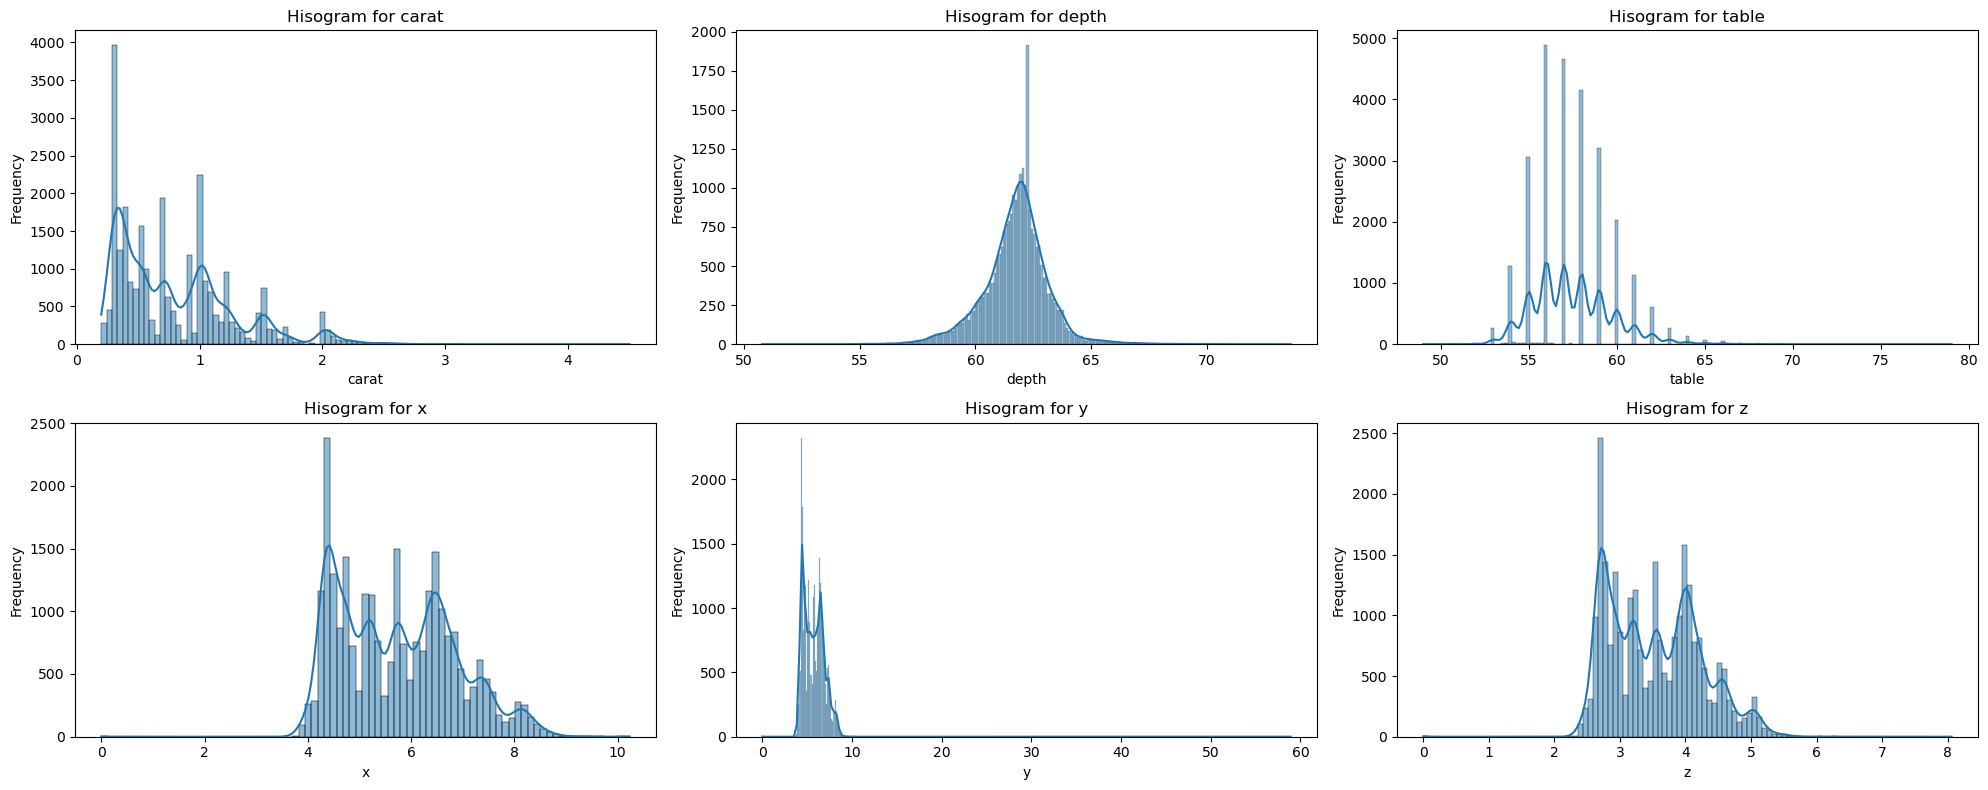

In [24]:
#Histogram plots to check for dfeature distributions
plt.figure(figsize=(20, 8))

for i, numerical_featuer in enumerate(numerical_feats,1):
    plt.subplot(2,3,i)
    sns.histplot(zircon_df[numerical_featuer], kde=True)
    plt.title(f'Hisogram for {numerical_featuer}')
    plt.xlabel(numerical_featuer)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **Histogram outcome**
1.  Carat : Carat shows multimodal distribution pattern with skewness to right.
2. Depth :	shows normal distribution.
3. Table :	table widly spread with multimodal distribution.
4. X : shows multimodal distribution skewd to the right.
5. Y :	has normal distribution in small range, skewd to the right.
6. Z :	shows multimodal distribution with skewness to the right.


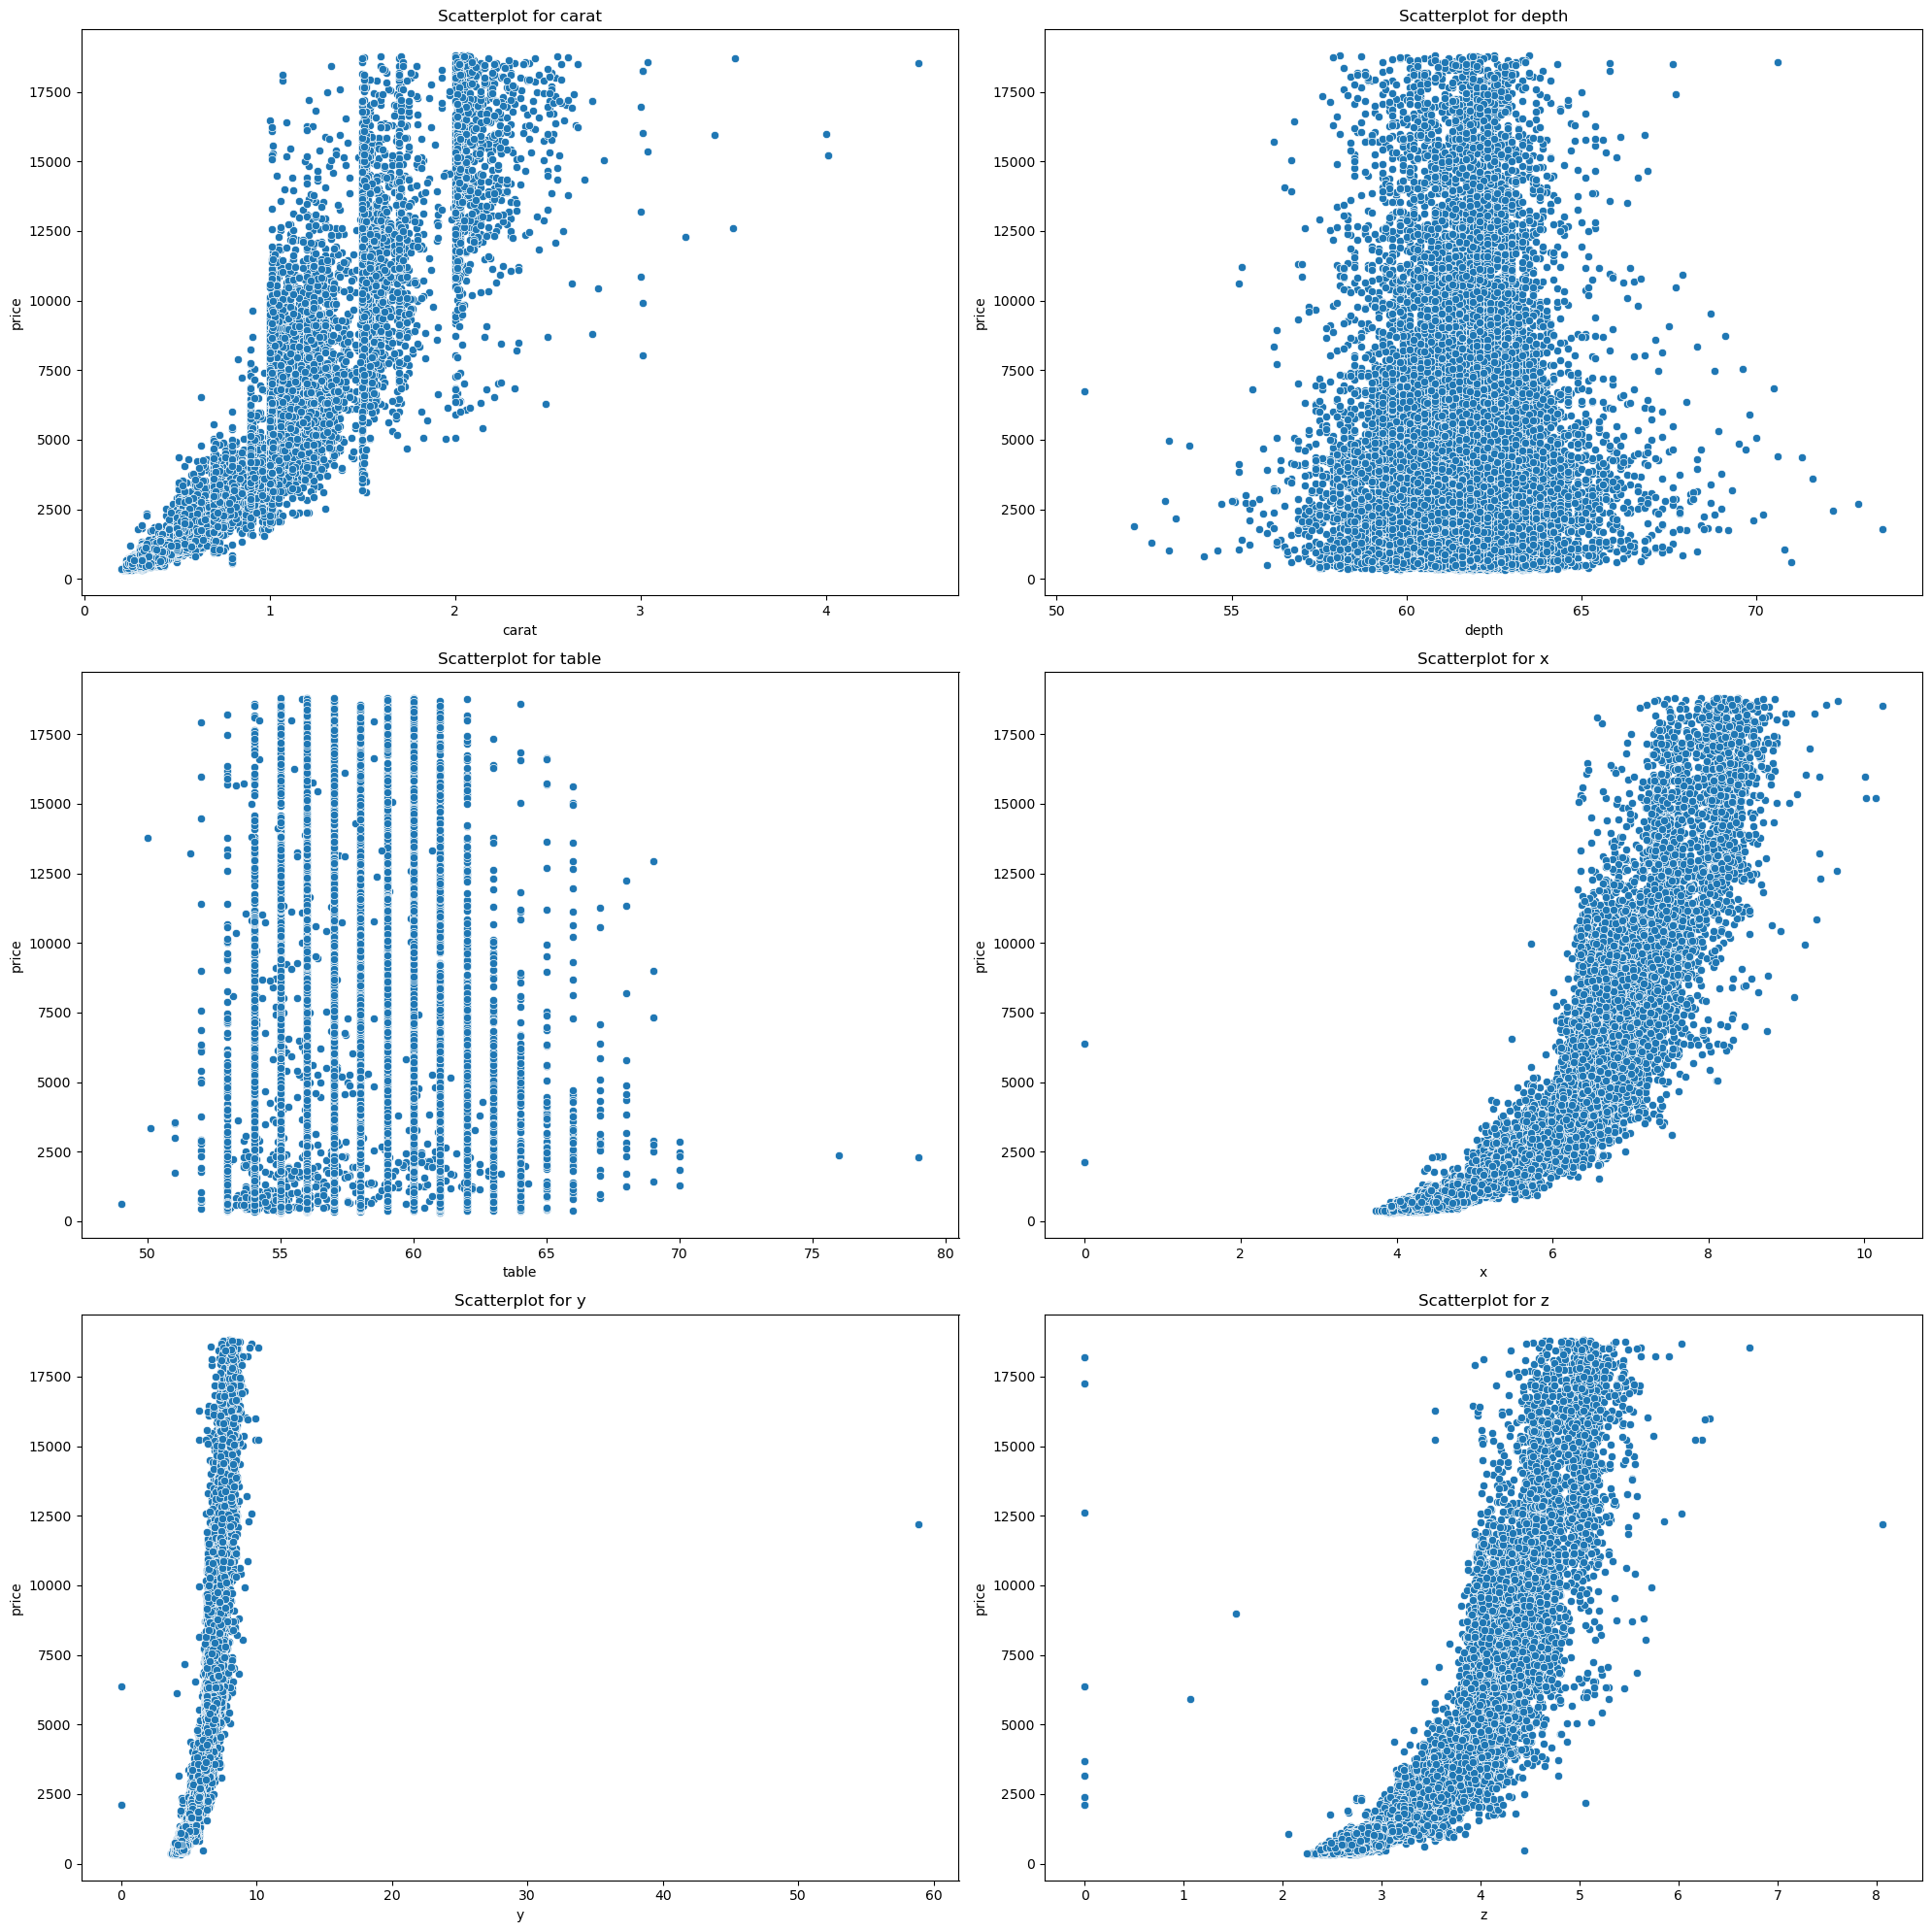

In [ ]:
#Scatterplot to check for outliers
plt.figure(figsize=(20, 20))

for i, numerical_featuer in enumerate(numerical_feats,1):
    plt.subplot(3,2,i)
    sns.scatterplot(x = numerical_featuer, y= 'price', data=zircon_df)
    plt.title(f'Scatterplot for {numerical_featuer}')
    plt.xlabel(numerical_featuer)
    plt.ylabel('price')
plt.tight_layout()
plt.show()

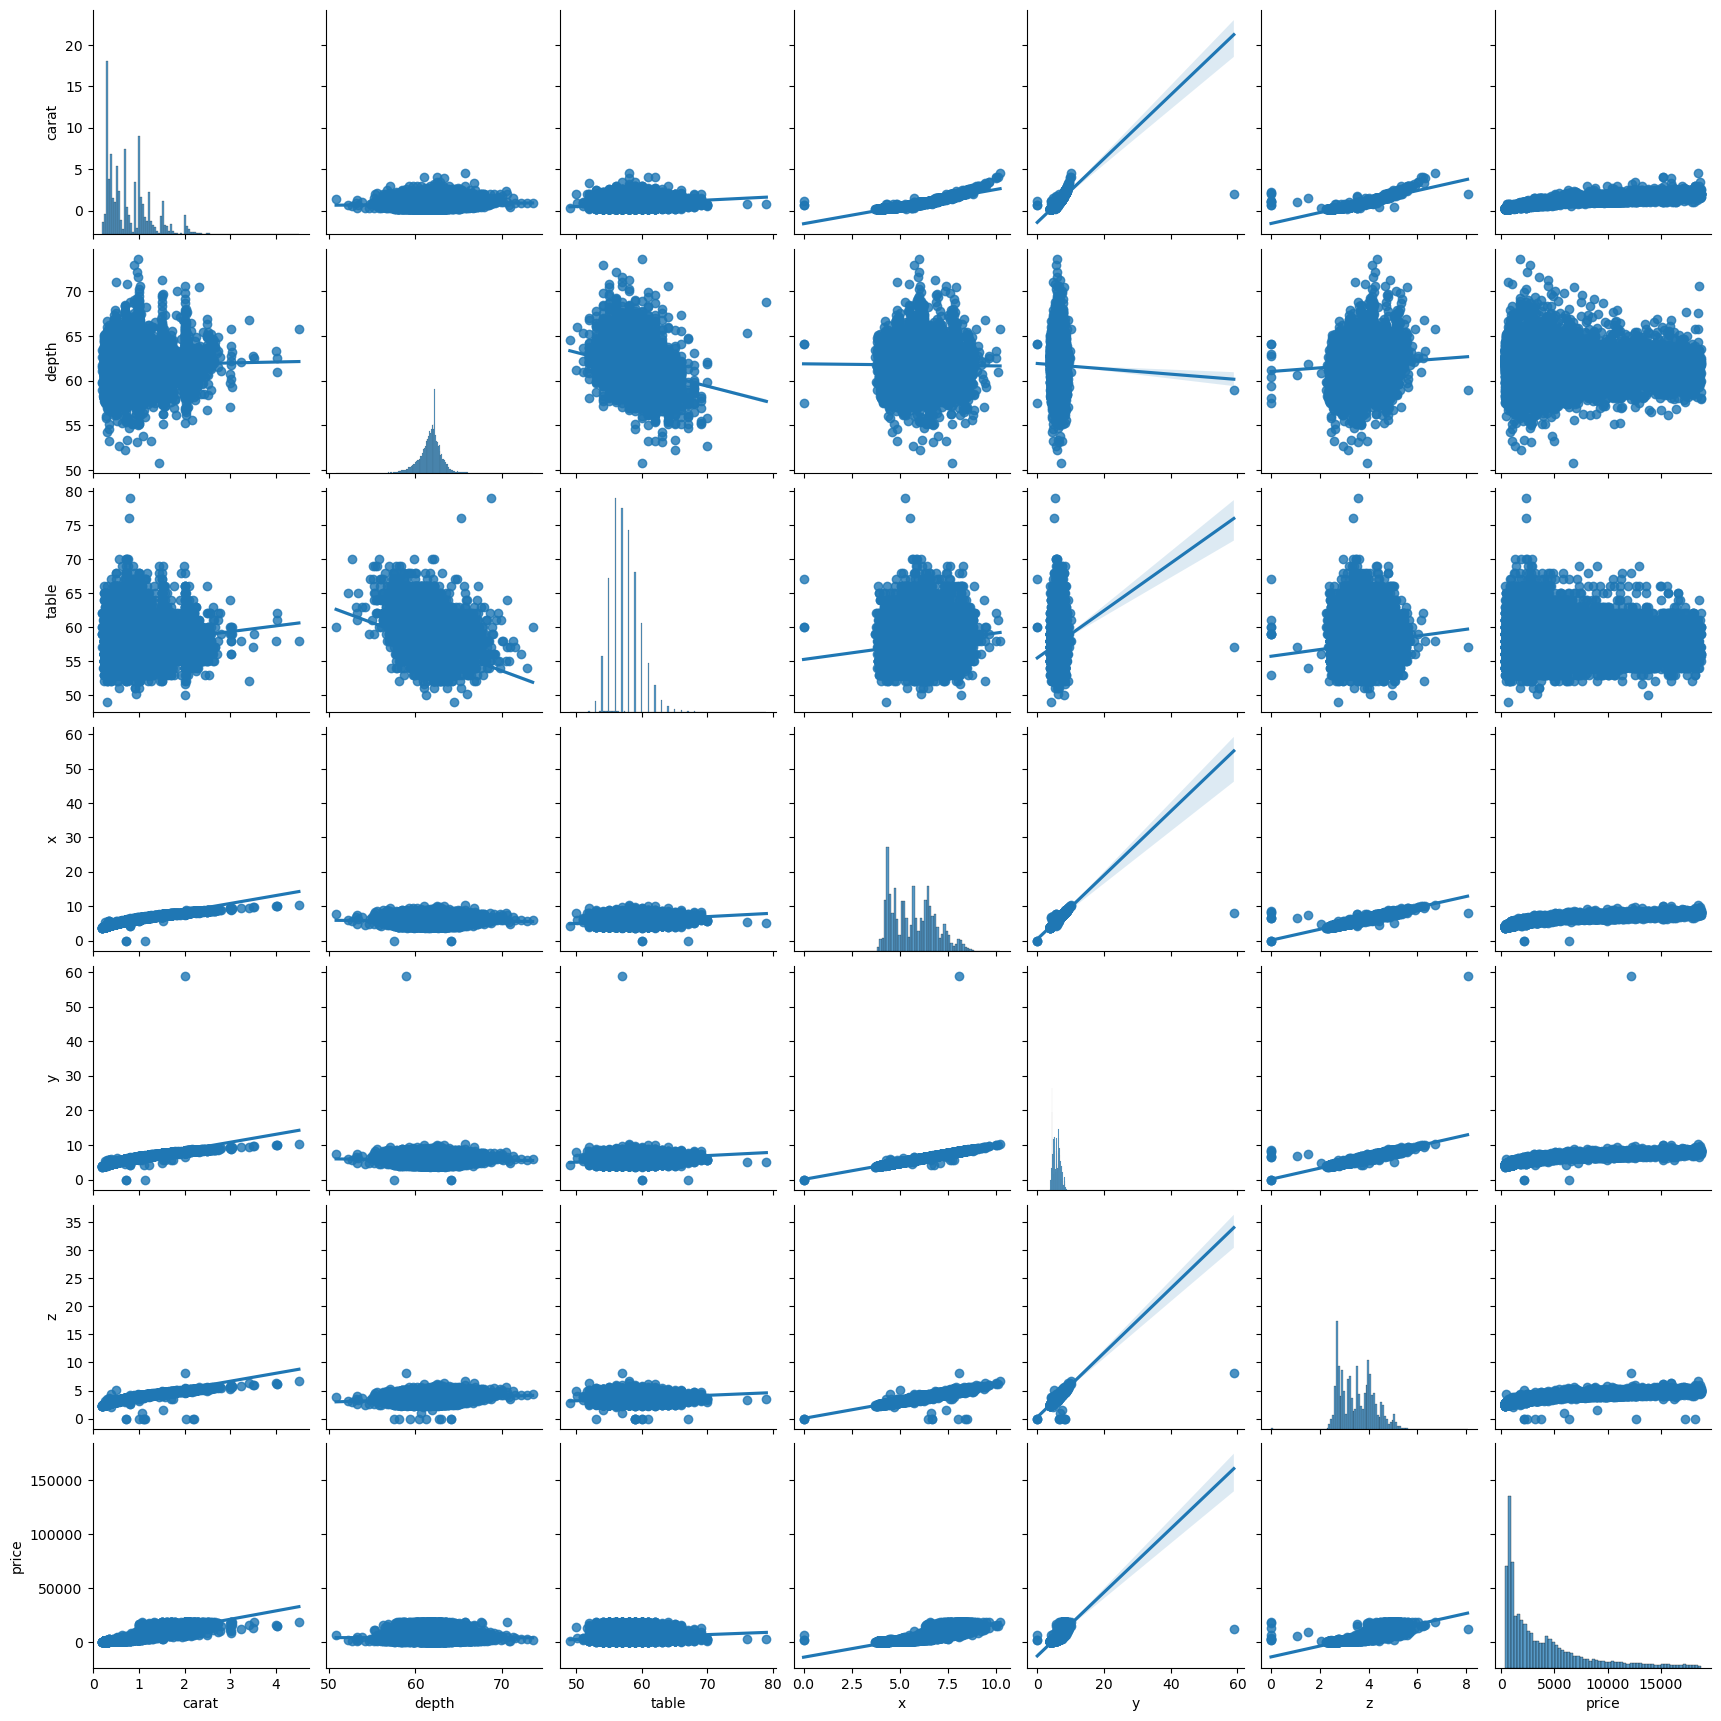

In [46]:
sns.pairplot(zircon_df, kind='reg')
plt.show()

### **Pairplot outcome**
1.  Carat : Carat shows positive relation with price.
2. Depth :	shows not considerable relation and could say no difference in price.
3. Table :	shows smooth positive relation with price.
4. X : shows smooth positive relation with price.
5. Y :	has considerable positive relation with price.
6. Z :	shows smooth positive relation with price.

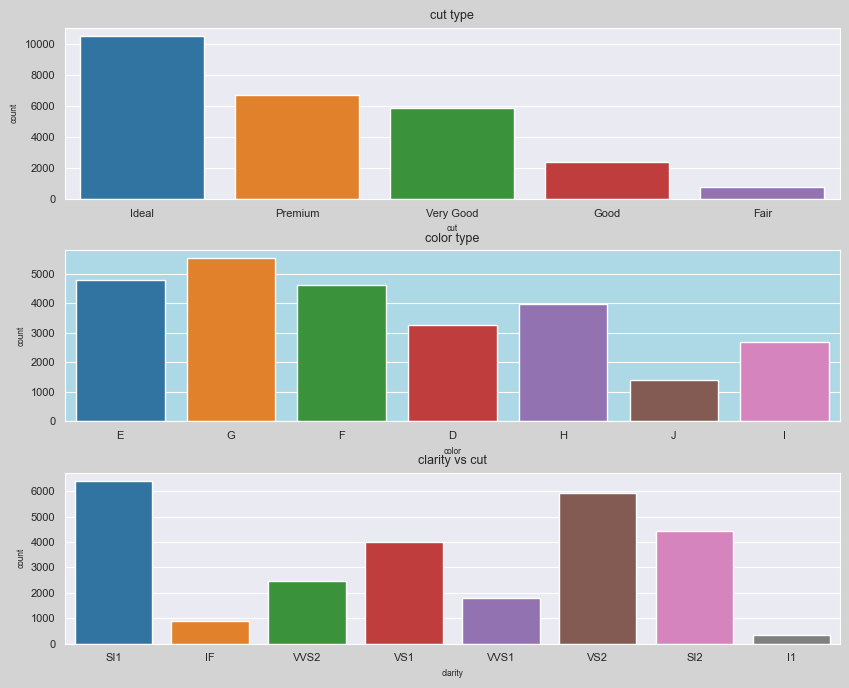

In [56]:
#check for frequency of nominal features through countplot
f,ax = plt.subplots(3,figsize=(10,8))
sns.countplot(x= 'cut', data=zircon_df, ax=ax[0])
ax[0].set_title('cut type', fontsize=9)
ax[0].set_xlabel('cut', fontsize=6)
ax[0].set_ylabel('count', fontsize=6)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)
f.patch.set_facecolor('lightgray') #You can set the background color of the entire figure using fig.patch.set_facecolor()


sns.countplot(x= 'color', data=zircon_df,  ax=ax[1])
ax[1].set_title('color type', fontsize=9)
ax[1].set_xlabel('color', fontsize=6)
ax[1].set_ylabel('count', fontsize=6)
ax[1].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)
ax[1].set_facecolor('lightblue')  # Set background color for the axes area


sns.countplot(x= 'clarity', data=zircon_df,  ax=ax[2])
ax[2].set_title('clarity vs cut', fontsize=9)
ax[2].set_xlabel('clarity', fontsize=6)
ax[2].set_ylabel('count', fontsize=6)
ax[2].tick_params(axis='x', labelsize=8)
ax[2].tick_params(axis='y', labelsize=8)
sns.set_style('darkgrid') # Options: 'whitegrid', 'darkgrid', 'dark', 'white', 'ticks' for plots


plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

### **Categorical features outcome**
1.  Cut : based on their order from ideal to fair frequency decrease.
2. Color :	shows G, E, F, H, D, I, J respectively frequency decreases, D with the best color is in fifth place and J is the last in frequecny.
3. Clarity :	SI2, VS2 have most frequency and the least goes to I1.

## Step 2- EDA

In [25]:
zircon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26266.0,0.798038,0.477191,0.2,0.40,0.70,1.0500,4.50
depth,26266.0,61.745062,1.412884,50.8,61.00,61.80,62.5000,73.60
table,26266.0,57.456132,2.230473,49.0,56.00,57.00,59.0000,79.00
x,26266.0,5.729086,1.127451,0.0,4.71,5.69,6.5475,10.23
y,26266.0,5.732867,1.166086,0.0,4.72,5.70,6.5400,58.90
z,26266.0,3.536546,0.699226,0.0,2.90,3.52,4.0400,8.06
price,26266.0,3937.742519,4022.149158,326.0,945.00,2375.00,5361.0000,18818.00


### **Statistical summary of the numerical features**

<blockquote style="margin-right:auto; margin-left:auto; color:pink; background-color: #78899; padding: 1em; margin:24px;">
   
<ul>
   <li> <font color="white" size=+1.0><b>Price:</b></font>
    <ul>
    <li> The maximum price is 18818, minimum is 4022 and avarage is 3937.74
    </ul>
 <li> <font color="white" size=+1.0><b>Depth:</b></font>
    <ul>
    <li> The minimum carat is 50.8, maximum is 73.60 and avarage is 61.74 
    </ul>
 <li> <font color="white" size=+1.0><b>Table:</b></font>
    <ul>
    <li> The average table is 61.74, & the max and min are 79 and 49 respectively
    </ul>
 <li> <font color="white" size=+1.0><b>X:</b></font>
    <ul>
    <li> The average x is 5.72, maximum is 10.23 and the minumum is 1.12 
    </ul>
<li> <font color="white" size=+1.0><b>Y:</b></font>
    <ul>
    <li> The average for y is 5.73. max is 58.90 and the min is 1.16
    </ul>
<li> <font color="white" size=+1.0><b>Z:</b></font>
    <ul>
    <li> The minimum z is 0.69, maximum is 8.06 and avarage is 3.53
    </ul>
</ul>                                                                                                                                             
</blockquote>    

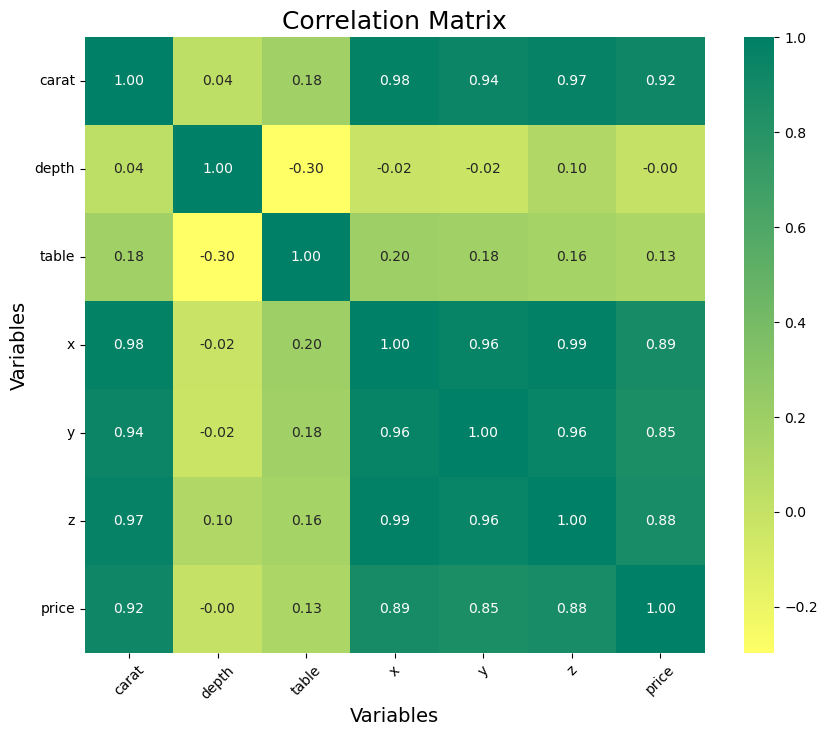

In [26]:
#Corrolation between numerical features
numerical_zir = zircon_df.select_dtypes(include=['float', 'int'])

corr = numerical_zir.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='summer_r', annot=True, fmt=".2f")
plt.title('Correlation Matrix', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)

plt.show()

### **Corrolation outcome**
1.  Carat : has strong relation with z, x, y and price respectively.
2. Depth :	shows lowest relation with other features.
3. Table :	after depth shows low relation with other features.
4. X : shows strong relation with z, carat, y and price respectively.
5. Y :	has strong relation with z, x carat and price.
6. Z :	shows the highest realtion with x, then carat, y and price.

In [28]:
#check for outlier, upper and lower limit of outlier


# Calculating mean and standard deviation for each numerical feature
means = zircon_df.select_dtypes(include=[np.number]).mean()   # for detection of outlier using Zscore we need compute mean & std
stds = zircon_df.select_dtypes(include=[np.number]).std()

# Calculating the upper and lower bounds for each feature
lower_bounds = means - 3 * stds
upper_bounds = means + 3 * stds

# Identifying the outlier values for each feature
outlier_values = {column: zircon_df[(zircon_df[column] < lower_bounds[column]) | 
                                         (zircon_df[column] > upper_bounds[column])][column]
                  for column in zircon_df.select_dtypes(include=[np.number]).columns}

bounds = pd.DataFrame({'Lower Bound': lower_bounds, 'Upper Bound': upper_bounds})
outlier_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in outlier_values.items()]))


feature_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
features_bounds = bounds.loc[feature_columns]

# Identifying the outlier values for the feature columns
feature_outlier_values = outlier_values_df[feature_columns]

# Displaying lower and upper bounds, and the actual outlier values 
features_bounds, feature_outlier_values


(       Lower Bound  Upper Bound
 carat    -0.633535     2.229611
 depth    57.506410    65.983714
 table    50.764713    64.147551
 x         2.346734     9.111438
 y         2.234608     9.231126
 z         1.438869     5.634223,
        carat  depth  table     x    y     z
 14       NaN   66.2    NaN   NaN  NaN   NaN
 62       NaN    NaN    NaN   NaN  NaN   NaN
 100      NaN   66.8    NaN   NaN  NaN   NaN
 102      NaN    NaN    NaN   NaN  NaN   NaN
 124     2.80    NaN    NaN   NaN  NaN   NaN
 ...      ...    ...    ...   ...  ...   ...
 26845   2.23    NaN    NaN   NaN  NaN   NaN
 26847    NaN    NaN    NaN   NaN  NaN   NaN
 26869   3.24    NaN    NaN  9.44  9.4  5.85
 26925    NaN   66.2    NaN   NaN  NaN   NaN
 26957    NaN    NaN    NaN   NaN  NaN   NaN
 
 [1162 rows x 6 columns])

In [ ]:
def drop_outlier(df, features):
    for feature in features:
        mean = df[feature].mean()
        std = df[feature].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        
        # Drop rows where the feature value is outside the bounds
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
    return df

# List of features
features = ['X', 'Y', 'Z', 'Price', 'Carat', 'Depth', 'Table']

# Dropping outliers
df_cleaned = drop_outlier(df, features)
df_cleaned.shape

## Pouran keep this code then delet to give Mojtaba

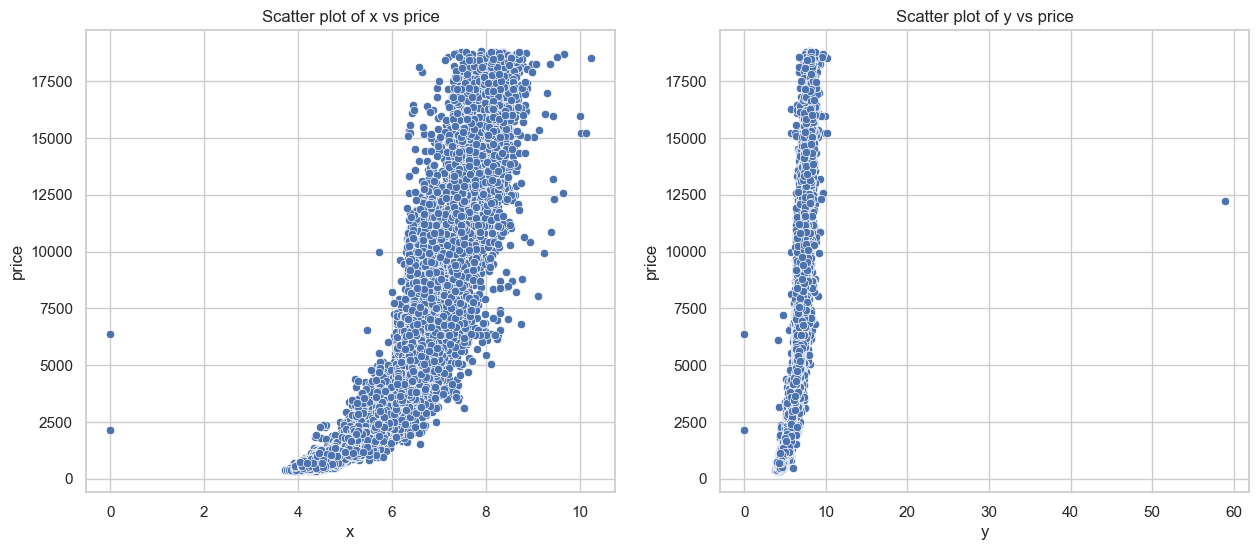

In [83]:
# Applying a seaborn theme for consistency and style
sns.set_theme(style="whitegrid")

# Initializing the figure
f = plt.figure(figsize=(15, 6))

# Creating the first subplot: price vs x
ax1 = f.add_subplot(121)
sns.scatterplot(x='x', y='price',  data=zircon_df, palette='magma', ax=ax1)
ax1.set_title('Scatter plot of x vs price')
ax1.set_xlabel('x')
ax1.set_ylabel('price')


# Creating the second subplot: price vs y
ax2 = f.add_subplot(122)
sns.scatterplot(x='y', y='price', data=zircon_df, palette='viridis',  ax=ax2)
ax2.set_title('Scatter plot of y vs price')
ax2.set_xlabel('y')
ax2.set_ylabel('price')
plt.show()

## Step 3-	Data Wrangling

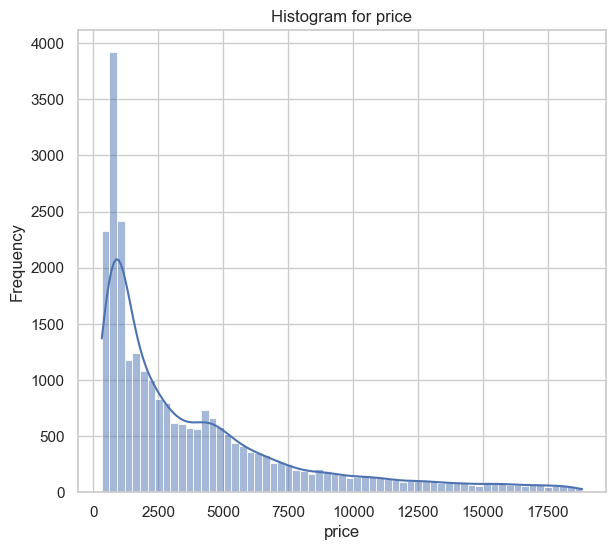

In [ ]:
#Apply a logarithmic transformation to the price to handle its right skewness inorder to normalize this data

#  Applying a seaborn theme for consistency and style
sns.set_theme(style="whitegrid")

# Initializing the figure
f = plt.figure(figsize=(15, 6))

# Creating the first subplot: price histplot

ax1 = f.add_subplot(121)
sns.histplot(x='price',  data=zircon_df, palette='magma', ax=ax1, kde=True)
ax1.set_title('Histogram for price')
ax1.set_xlabel('price')
ax1.set_ylabel('Frequency')
plt.show()

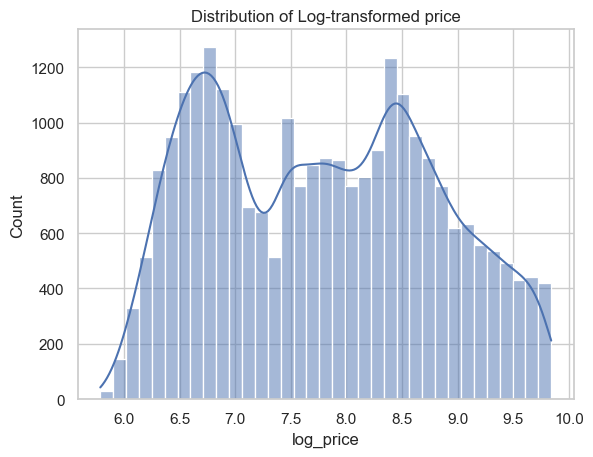

In [86]:
# Applying a logarithmic transformation to the target variable
zircon_df['log_price'] = np.log(zircon_df['price'])

# Re-examine the distribution of the transformed target variable
sns.histplot(zircon_df['log_price'], kde=True)
plt.title('Distribution of Log-transformed price')
plt.show()

In [ ]:
# Is it ok if I normalize Carat?????
# Function to apply log transformation and data normalization
# Applying a logarithmic transformation to the target variable
df['log_price'] = np.log(df['Price'])
df['log_Carat'] = np.log(df['Carat'])

# Re-examine the distribution of the transformed target variable

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of Log-transformed price')
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(df['log_Carat'], kde=True)
plt.title('Distribution of Log-transformed Carat')
plt.xlabel('Log of Carat')
plt.tight_layout()
plt.show()

In [ ]:
# functionmethode for data normalization
# Function to apply log transformation
def log_transform(df, features):
    df_transformed = df.copy()  # Avoid modifying the original dataframe
    for feature in features:
        # Handle zero or negative values by adding a small constant
        if (df[feature] <= 0).any():
            df_transformed[feature] = np.log(df[feature] + 1)
        else:
            df_transformed[feature] = np.log(df[feature])
    return df_transformed

# List of features
features = ['X', 'Y', 'Z', 'Price', 'Carat', 'Depth', 'Table']

# Apply log transformation
df_transformed = log_transform(df, features)

# Re-examine the distribution of the transformed features
for feature in features:
    sns.histplot(df_transformed[feature], kde=True)
    plt.title(f'Distribution of Log-transformed {feature}')
    plt.xlabel(f'Log of {feature}')
    plt.show()

In [95]:
#zircon dataset after logaritmic transformation of Price
zircon_df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price,log_price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,6.212606
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,6.891626


In [96]:
zircon_df_encoded = pd.get_dummies(zircon_df, columns=['cut', 'color', 'clarity'], drop_first=True)

In [ ]:
#to Encode Cut Values  Here’s how to achieve your goal of encoding the Cut column: Using map:
#  Create a mapping for the categorical values
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

# Apply the mapping to the 'Cut' column
df_encoded = df.copy()  # Work on a copy to avoid modifying the original
df_encoded['Cut'] = df_encoded['Cut'].map(cut_mapping)

print(df_encoded.head())

In [98]:
zircon_df_encoded.head(2)

,carat,depth,table,x,y,z,price,log_price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,6.212606,False,True,...,False,False,False,False,True,False,False,False,False,False
1,0.33,60.8,58.0,4.42,4.46,2.70,984,6.891626,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
zircon_df_encoded.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'log_price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [ ]:
#we have 8 types of clarity in original dataset, after encoding in the encoded dataset we have 7 columns of clarity because of `DROP_FIRST=TURE`
zircon_df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

## Step 5-	Building a Regression Model

In [104]:
# Splitting the dataset into features and target variable
X = zircon_df_encoded.drop(['price', 'log_price'], axis=1)
y = zircon_df_encoded['log_price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the values for the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Creating a DataFrame for actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Displaying the evaluation metrics and the first few rows of the results DataFrame
print('The Mean Average Error(MAE) is: ', mae)
print('The Mean Square Error(MSE) is: ', mse)
print('The Root Mean Square Error(RMSE) is: ', rmse)
print('The R Square is: ', r2)

results_df.head(10)

The Mean Average Error(MAE) is:  0.11081152018921846
The Mean Square Error(MSE) is:  0.0605754501222271
The Root Mean Square Error(RMSE) is:  0.24612080392000002
The R Square is:  0.9423662252193554


,Actual,Predicted
19430,9.190444,9.060730
5654,9.601707,9.468091
23648,9.018938,9.052183
12909,9.337149,9.354764
15798,8.111928,8.113664
21953,9.505916,9.568546
22783,6.535241,6.471683
26031,7.559559,7.486916
10006,8.582044,8.527604
25884,8.402231,8.477119


In [105]:
# Convert the log-transformed predictions back to the original scale
results_df['Actual'] = np.exp(results_df['Actual'])
results_df['Predicted'] = np.exp(results_df['Predicted'])

# Display the DataFrame to compare actual and predicted values in their original scale
results_df.head(10)

,Actual,Predicted
19430,9803.0,8610.431870
5654,14790.0,12940.161107
23648,8258.0,8537.155241
12909,11352.0,11553.735516
15798,3334.0,3339.793258
21953,13439.0,14307.601288
22783,689.0,646.571307
26031,1919.0,1784.539636
10006,5335.0,5052.324769
25884,4457.0,4803.589193
